In [3]:
%load_ext autoreload
%autoreload 2
from corr_study.datasetApi import *
from corr_study.correlation import *
from corr_study.voxels import *
from matplotlib import pyplot as plt

dataset = Dataset("corr_study/dataset/")

route = dataset.get_routes_TLC()[0]
ids = dataset.get_ids_CV(Town.T1, Weather.Clear, Time.Sunset, Sensor.LT)

# pcd_top = dataset.open_sample_CV(Town.T1, Weather.Clear, Time.Night, Sensor.LT, ids[0]) 
# pcd_front_left = dataset.open_sample_CV(Town.T1, Weather.Clear, Time.Night, Sensor.LFL, ids[0]) 
# pcd_front_rigth = dataset.open_sample_CV(Town.T1, Weather.Clear, Time.Night, Sensor.LFR, ids[0]) 
# cam_front = dataset.open_measurement_sample_TLC(route, Weather.Clear, Time.Noon, Sensor.CF, 10)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
center_mass_corr = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    center_mass_corr.append(pcd_top.compare_using_voxels(pcd_top_compare, 0.5))

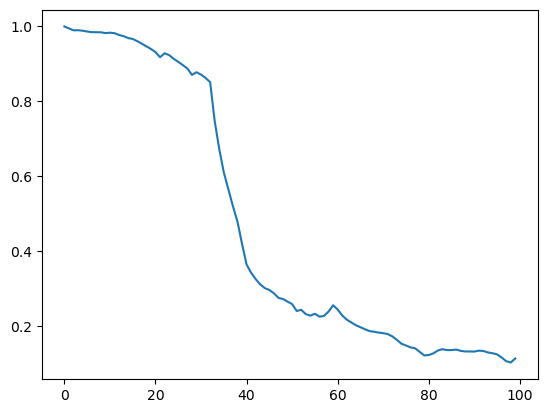

In [7]:
plt.plot(center_mass_corr)
plt.show()

In [21]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
v_top = pcd_top.voxelize(0.5)
corr = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    corr.append(v_top.compute_correlation(pcd_top_compare.voxelize(0.5, v_top.boundaries)))


In [25]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
v_top = pcd_top.voxelize(0.5)
cross_corr = []
for i in range(1, 101, 1):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    cross_corr.append(v_top.compute_correlation_inferring_offset(pcd_top_compare.voxelize(0.5, v_top.boundaries)))

In [27]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
center_mass_corr_weighted = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    center_mass_corr_weighted.append(pcd_top.compare_using_voxels(pcd_top_compare, 0.5, weighted=True))

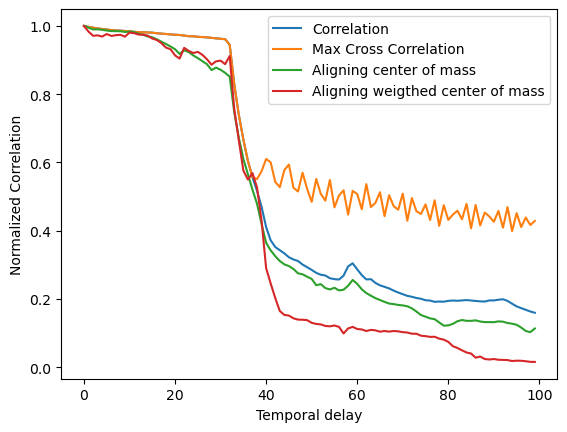

In [34]:
fig, ax = plt.subplots(1,1)
c, = ax.plot(corr)
cc, = ax.plot(cross_corr)
cm, = ax.plot(center_mass_corr)
cmw, = ax.plot(center_mass_corr_weighted)
ax.legend([c, cc, cm, cmw], ["Correlation", "Max Cross Correlation", "Aligning center of mass", "Aligning weigthed center of mass"])
plt.ylabel("Normalized Correlation")
plt.xlabel("Temporal delay")
plt.show()

In [30]:
dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 32).visualize()
dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 35).visualize()